**LOGISTIC REGRESSION**

In [ ]:
# Importing the required library
import pandas as pd
# Importing the dataset
chd = pd.read_csv("/content/chd_data.csv")
# Printing the first 5 rows
chd.head()

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


Text(0.5, 1.0, 'Age vs. Coronary Heart Disease')

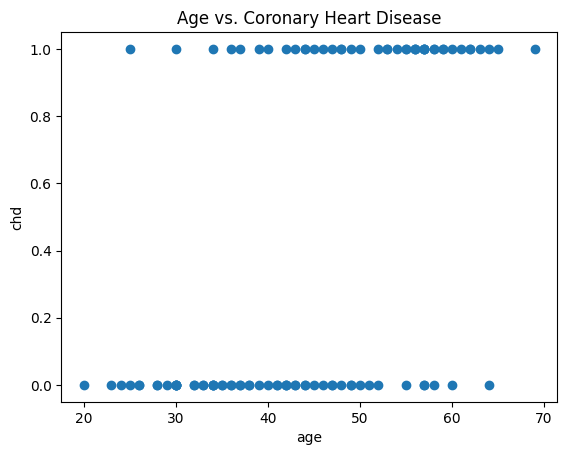

In [ ]:
# Importing the required library
import matplotlib.pyplot as plt
%matplotlib inline
# Plotting the 'chd' values against 'age' values
plt.scatter("age","chd",data=chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs. Coronary Heart Disease")

In [3]:
# Importing the required class
from sklearn.model_selection import train_test_split
# Specifying the columns as predictor and target variable
predictors = ["age"]
target = "chd"
X = chd[predictors] # X contains the predictor values or input data
y = chd[target] # y contains the target labels
# Spliting the data in training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Checking the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (70, 1)
Shape of y_train: (70,)
Shape of X_test: (30, 1)
Shape of y_test: (30,)


In [4]:
# Importing the required class
from sklearn.linear_model import LogisticRegression
# Creating the object of the class LogisticRegression
model = LogisticRegression()
# Training the model using the training data
model.fit(X_train,y_train)
# Getting the intercept and the coefficients of the model
print("Intercept:",model.intercept_,"\nCoefficients:", model.coef_)

Intercept: [-5.6511192] 
Coefficients: [[0.11144141]]


In [6]:
import numpy as np
# Creating a sample data
test=np.array([29]).reshape(1,-1)
# Predicting the probabilities for each of the class labels
print("Predicted probability for class '0' and '1' respectively:", model.predict_proba(test))
# Predicting the final class label or target value
print("\nPredicted target i.e. 'chd' value:",model.predict(test))

Predicted probability for class '0' and '1' respectively: [[0.91828861 0.08171139]]

Predicted target i.e. 'chd' value: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [7]:
print("Accuracy score of the model on training data:", model.score(X_train, y_train))
print("Accuracy score of the model on test data:", model.score(X_test, y_test))

Accuracy score of the model on training data: 0.7428571428571429
Accuracy score of the model on test data: 0.7333333333333333


In [8]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Importing the dataset
credit_data = pd.read_csv("/content/credit_risk.csv")

In [9]:
# Understanding the values the 'class' column (our target column in this analysis) can take
credit_data['class'].unique()

array(['good', 'bad'], dtype=object)

In [10]:
# Selecting predictors as all columns except the 'class' column
X = credit_data.columns.drop("class")
# Setting the target as the 'class' column
y = credit_data['class']

In [11]:
# Encoding all the features/predictor variables using the get_dummies method()
credit_data_encoded = pd.get_dummies(credit_data[X])
# Checking the shape of the input data
credit_data_encoded.shape

(1000, 61)

In [12]:
# Importing the required module
from sklearn.model_selection import train_test_split
#splitting data into train and test datasets in 85:15 ratio
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100)
# Checking the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (850, 61)
Shape of y_train: (850,)
Shape of X_test: (150, 61)
Shape of y_test: (150,)


In [15]:
# Importing the required class.
from sklearn.linear_model import LogisticRegression
# Instantiating the required algorithm for model building.
model = LogisticRegression(max_iter = 500)
# Building the model based on the training data.
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [16]:
# Getting the accuracy on training data
train_accuracy = model.score(X_train,y_train)
print("Train accuracy = ", train_accuracy)
# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Test accuracy = ", test_accuracy)

Train accuracy =  0.7894117647058824
Test accuracy =  0.7333333333333333


In [17]:
# Predicting targets based on the model built
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
# Importing the required function
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train,train_predictions)
# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)

,bad,good
bad,138,119
good,60,533


In [18]:
# Confusion matrix for the test data
test_conf_matrix = confusion_matrix(y_test,test_predictions)
pd.DataFrame(test_conf_matrix,columns=model.classes_,index=model.classes_)

,bad,good
bad,18,25
good,15,92


In [19]:
# Calculating train accuracy from confusion matrix
train_correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions = train_conf_matrix.sum()
train_accuracy = train_correct_predictions/train_total_predictions
print(train_accuracy)

0.7894117647058824


In [20]:
# Calculating test accuracy from confusion matrix
test_correct_predictions = test_conf_matrix[0][0]+test_conf_matrix[1][1]
total_predictions = test_conf_matrix.sum()
test_accuracy = test_correct_predictions/total_predictions
print(test_accuracy)

0.7333333333333333


In [21]:
# Importing the required function
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

         bad       0.55      0.42      0.47        43
        good       0.79      0.86      0.82       107

    accuracy                           0.73       150
   macro avg       0.67      0.64      0.65       150
weighted avg       0.72      0.73      0.72       150



**DECISION TREES**

In [22]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Reading data from input csv file
credit_data = pd.read_csv("/content/credit_risk.csv")
# Uncomment the following line to view the sample data
credit_data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [23]:
# Understanding the various attributes
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [24]:
# Selecting the predictor attributes
X = credit_data.columns.drop("class")
# Selecting  the target
y = credit_data['class']

In [25]:
# Encoding all the predictor variables to convert the categorical values to numerical values.
credit_data_encoded = pd.get_dummies(credit_data[X])
print("Total number of predictors after encoding = ", len(credit_data_encoded.columns))
# Printing the list of columns after encoding to understand the encoding process
credit_data_encoded.columns

Total number of predictors after encoding =  61


Index(['credit_usage', 'current_balance', 'location', 'residence_since',
       'cc_age', 'existing_credits', 'num_dependents', 'over_draft_0<=X<200',
       'over_draft_<0', 'over_draft_>=200', 'over_draft_no checking',
       'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'Average_Credit_Balance_100<=X<500',
       'Average_Credit_Balance_500<=X<1000', 'Average_Credit_Balance_<100',
       'Average_Credit_Balance_>=1000',
       'Average_Credit_Balance_no known savings', 'employment_1<=X<4',
       'employment_4<=X<7', 'employment_<1', 'employment_>=7',
       'employment_unemployed', 'p

In [26]:
# Import the required function
from sklearn.model_selection import train_test_split
#splitting data into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(credit_data_encoded, y,test_size=0.15,random_state=100)
# Printing the shape of the resulting datasets
print("Shape of X_train and y_train are:", X_train.shape, "and", y_train.shape, " respectively")
print("Shape of X_test and y_test are:", X_test.shape, "and", y_test.shape, " respectively")

Shape of X_train and y_train are: (850, 61) and (850,)  respectively
Shape of X_test and y_test are: (150, 61) and (150,)  respectively


In [27]:
# Importing required class
from sklearn.tree import DecisionTreeClassifier
# Creating an object of the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state = 1)
# Training model on the training data
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [28]:
# Predicting target values using the model built on training data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

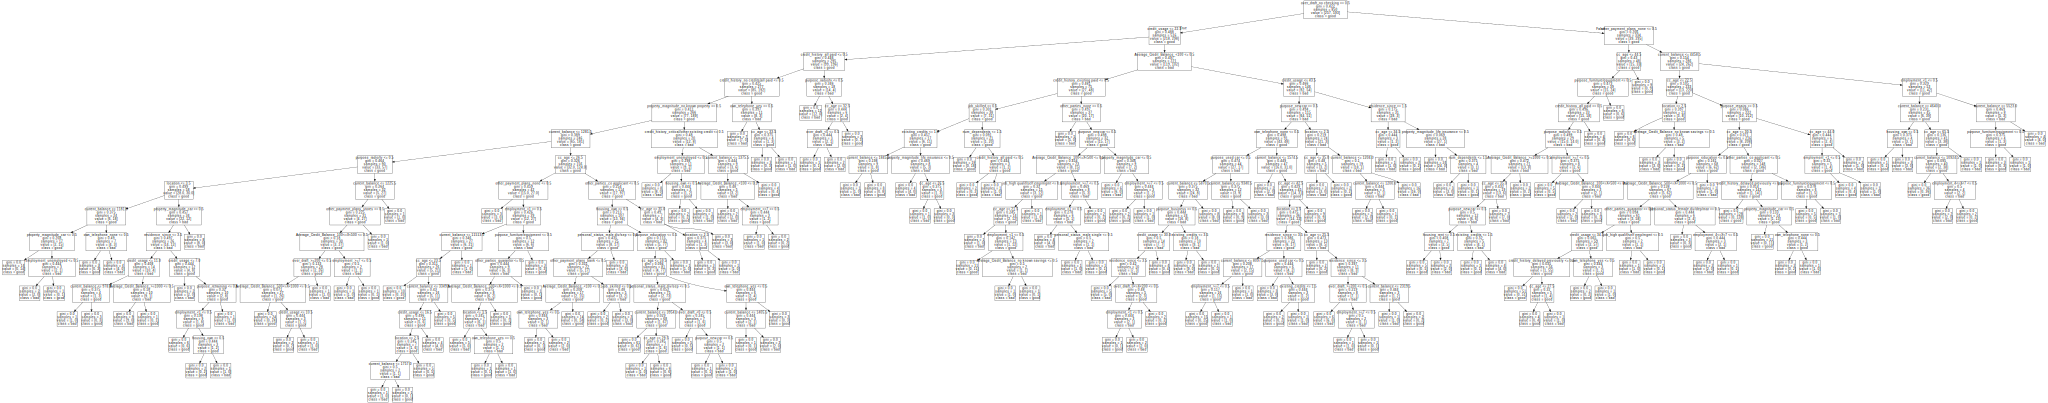

In [29]:
# Importing the required libraries (Ensure that they are already installed.)
from sklearn.tree import export_graphviz
import graphviz
# Generating the tree
dot_data = export_graphviz(model, out_file=None,
                          feature_names=credit_data_encoded.columns,
                          class_names=model.classes_,
                          )
graph = graphviz.Source(dot_data)
graph

In [30]:
# Getting the accuracy on train data
train_accuracy = model.score(X_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)
# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Accuracy of the model on test data = ",test_accuracy)

Accuracy of the model on train data =  1.0
Accuracy of the model on test data =  0.6533333333333333


In [31]:
# Model 1:
# Min number of samples required in a set to split = 10
# Min reduction in impurity required for split to be included in the tree = 0.005
model1 = DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)
# Fitting the model to the training data
model1.fit(X_train,y_train)
# Measuring the accuracy of the model
print("train_accuracy = ", model1.score(X_train,y_train))
print("test_accuracy = ", model1.score(X_test,y_test))

train_accuracy =  0.7635294117647059
test_accuracy =  0.7266666666666667


In [32]:
# Model 2:
# Min number of samples required in a set to split = 20
# Min reduction in impurity required for split to be included in the tree = 0.1
model2 = DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)
# Fitting the model to the training data
model2.fit(X_train,y_train)
# Measuring the accuracy of the model
print("Model2 train accuracy = ", model2.score(X_train,y_train))
print("Model2 test accuracy = ", model2.score(X_test,y_test))

Model2 train accuracy =  0.6976470588235294
Model2 test accuracy =  0.7133333333333334


**K NEAREST NEIGHBOURS**

In [35]:
#reading data from input csv file
defaulter = pd.read_csv("/content/defaulter_subset.csv")
defaulter

,defaulter,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


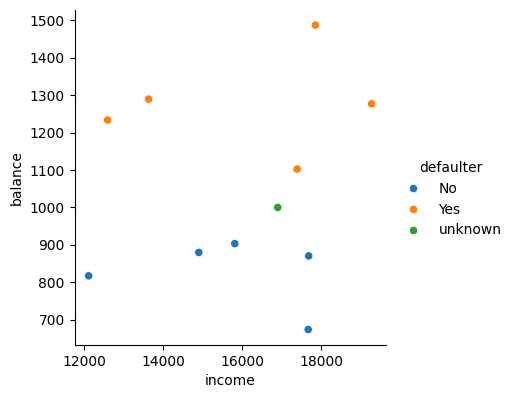

In [36]:
#visualizing data using seaborn - pariplot
import seaborn as sns
sns.pairplot(defaulter,hue="defaulter",
             x_vars="income",y_vars="balance",height=4)

In [37]:
# retrieving first data point from the dataset
x1 = defaulter.loc[0,["balance","income"]]
# retrieving second data point from the dataset
x2 = defaulter.loc[1,["balance","income"]]
# Euclidean distance between first and second data point
np.linalg.norm(x1-x2)
#output
#5787.1537602581275

5787.1537602581275

In [38]:
# considering 3 random datapoints - t1, t2, t3
t1 = np.array([26,1000])
t2 = np.array([66,1000])
t3 = np.array([36,10000])
# distance between t1 & t3
dist_t3_t1 = np.linalg.norm(t3-t1)
# distance between t2 & t3
dist_t2_t3 = np.linalg.norm(t2-t3)
print("Distance between t2 and t3",dist_t2_t3,
      "\nDistance between t1 and t3",dist_t3_t1)
#output
#Distance between t2 and t3 9000.049999861112
#Distance between t1 and t3 9000.00555555384

Distance between t2 and t3 9000.049999861112 
Distance between t1 and t3 9000.00555555384


In [39]:
# Using MinMaxScaler of Scikit Learn library for Normalization of all features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(defaulter[["balance","income"]])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter

,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [40]:
#distance between two normalized data points
x1_n = defaulter.loc[0,["norm_balance","norm_income"]]
x2_n = defaulter.loc[1,["norm_balance","norm_income"]]
np.linalg.norm(x1_n-x2_n)
#output
#1.1489497815843785

1.1489497815843788

In [41]:
# Lambda function to calculate Euclidean distance
x11 = defaulter.loc[10,["norm_balance","norm_income"]]
dist_to_X11 = lambda x: np.linalg.norm(x-x11)
# calculating Euclidean Distance
defaulter["dist_toX11"] = defaulter[["norm_balance",
                                               "norm_income"]].apply(dist_to_X11,axis=1)
# sorting the datapoints based on distance to find the 'k' nearest neighbors
defaulter.sort_values("dist_toX11")

,defaulter,student,balance,income,norm_balance,norm_income,dist_toX11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114


In [42]:
#reading in data from csv file
defaulter = pd.read_csv("/content/defaulter.csv")

In [43]:
from sklearn.preprocessing import MinMaxScaler
#applying MinMaxScaler to the default dataset
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter.head()

,defaulter,student,balance,income,norm_balance,norm_income
0,No,No,729.526495,44361.62507,0.274845,0.598905
1,No,Yes,817.180407,12106.13470,0.307868,0.155727
2,No,No,1073.549164,31767.13895,0.404453,0.425862
3,No,No,529.250605,35704.49394,0.199392,0.479959
4,No,No,785.655883,38463.49588,0.295991,0.517867


In [44]:
from sklearn.model_selection import train_test_split
# selecting the predictors and target
X=defaulter[['norm_balance','norm_income']]
Y=defaulter['defaulter']
# splitting data into train and test data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
#kNN with k=3
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [46]:
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.977375 0.967

0.977375 0.967


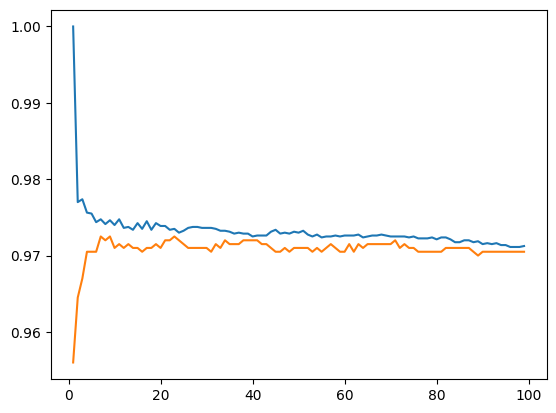

In [48]:
train_accuracies = []
test_accuracies = []
# building KNN model for values of k from 1 to 100
k_vals = [i for i in range(1,100)]
features = ["norm_balance","norm_income"]
target = "defaulter"
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)

**SUPPORT VECTOR MACHINE**

In [49]:
#reading input from csv file
iris_data = pd.read_csv("/content/iris.csv")
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
#creating new column 'v_nv', to distinguish versicolor species from rest
#the below lambda function returns 0 for 'versicolor' species and returns 1 for rest.
v_nv_fn = lambda x: 0 if x=="versicolor" else 1
# new column added into dataframe
iris_data["v_nv"] = iris_data["Species"].apply(v_nv_fn)
iris_data[iris_data['v_nv']==0].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
50,7.0,3.2,4.7,1.4,versicolor,0
51,6.4,3.2,4.5,1.5,versicolor,0
52,6.9,3.1,4.9,1.5,versicolor,0
53,5.5,2.3,4.0,1.3,versicolor,0
54,6.5,2.8,4.6,1.5,versicolor,0


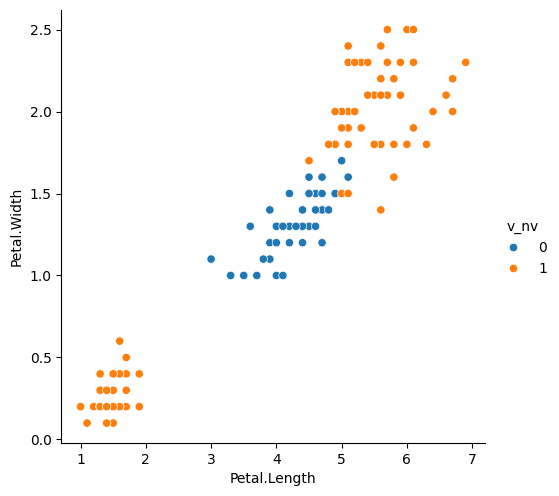

In [51]:
#visualization using seaborn - pairplot
import seaborn as sns
sns.pairplot(iris_data,
             x_vars = "Petal.Length",y_vars="Petal.Width",
             hue="v_nv",height=5)

In [52]:
#Support Vector Classification
from sklearn.svm import SVC
#setting predictors and target
X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["v_nv"]
# model building
model = SVC()
model.fit(X,Y)
model.score(X,Y)
# 0.9533333333333334

0.9533333333333334

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision boundary of SVM on iris data')

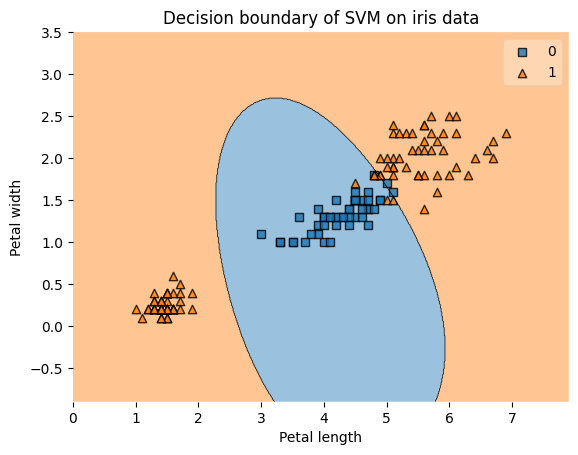

In [53]:
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y).ravel()
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Decision boundary of SVM on iris data')

In [54]:
# encoding the species column
iris_data.loc[iris_data.Species=="setosa","Species"] = 0
iris_data.loc[iris_data.Species=="versicolor","Species"] = 1
iris_data.loc[iris_data.Species=="virginica","Species"] = 2
#data type (dtype) of the column will be converted to 'category'
iris_data.Species = iris_data.Species.astype("category")
                           #https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [55]:
X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["Species"]
model = SVC()
model.fit(X,Y)

SVC()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Multiclass classification on iris using SVM')

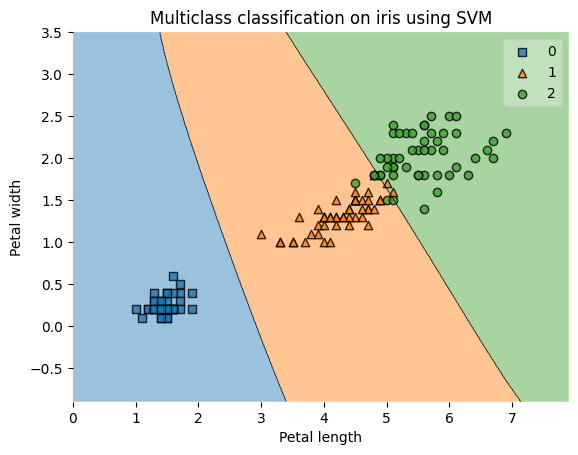

In [56]:
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y)
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Multiclass classification on iris using SVM')

**CROSS VALIDATION**

In [57]:
#read data from input csv file
defaulter = pd.read_csv("/content/defaulter.csv")

In [58]:
#### Normalizing the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]

In [59]:
from sklearn.model_selection import train_test_split
X=defaulter[["norm_balance","norm_income"]]
Y=defaulter['defaulter']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all k neighbor values
param_grid = {'n_neighbors': np.arange(1, 15,2)}
'''using GridSearchCV to perform k-fold validation'''
knn_gscv = GridSearchCV(knn, param_grid,return_train_score=True, verbose=1,scoring='accuracy')
#fit model to data
knn_gscv.fit(X_train,Y_train)
#storing results to dataframe
#print(knn_gscv.cv_results_)
df=pd.DataFrame(knn_gscv.cv_results_)
#filtering out columns
df=df[['param_n_neighbors','mean_train_score','mean_test_score']]

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [61]:
df

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.955500
1,3,0.977781,0.967500
2,5,0.975438,0.970625
3,7,0.974562,0.971375
4,9,0.974781,0.972125
5,11,0.974437,0.972500
6,13,0.974187,0.972625


In [62]:
model = KNeighborsClassifier(n_neighbors = 9, metric="euclidean")
model.fit(X_train,Y_train)
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.971 0.9685

0.974625 0.9725


**ENSEMBLE METHODS**

In [63]:
#reading input data from csv file
spam_data = pd.read_csv("/content/spambase.csv")

In [64]:
from sklearn.model_selection import train_test_split
features = spam_data.columns.drop('spam')
target = "spam"
X=spam_data[features]
Y=spam_data[target]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [65]:
from sklearn.ensemble import RandomForestClassifier
# building model with RandomforestClassifier with 10 underlying Decision tree models/ estimators
model = RandomForestClassifier(n_estimators=10,
                               min_samples_split=20,
                               min_impurity_decrease=0.05)
model.fit(X_train,Y_train)
# Evaluate the model performance
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.8633152173913043 0.8577633007600435

0.852445652173913 0.8555917480998915


In [66]:
feature_imps = pd.DataFrame(np.array([features,
                                      model.feature_importances_]).T,
                            columns=["feature","importance"])
feature_imps.sort_values(by="importance",ascending=False)

,feature,importance
6,word_freq_remove,0.296243
51,char_freq_!,0.293052
54,capital_run_length_average,0.171075
55,capital_run_length_longest,0.1
15,word_freq_free,0.06769
24,word_freq_hp,0.037098
52,char_freq_$,0.034842
39,word_freq_direct,0.0
38,word_freq_pm,0.0
37,word_freq_parts,0.0


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#building AdaBoostClassifier with 10 models, also called as estimators.
model = AdaBoostClassifier(n_estimators=10)
model.fit(X_train,Y_train)
# Evaluating the model performance
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.9195652173913044 0.9272529858849077

0.9067934782608695 0.9131378935939196


In [68]:
feature_imps = pd.DataFrame(np.array([features,
                                      model.feature_importances_]).T,
                            columns=["feature","importance"])
feature_imps.sort_values(by="importance",ascending=False)

,feature,importance
52,char_freq_$,0.181293
51,char_freq_!,0.154507
24,word_freq_hp,0.123299
6,word_freq_remove,0.119936
15,word_freq_free,0.109165
36,word_freq_1999,0.101538
26,word_freq_george,0.09101
55,capital_run_length_longest,0.078189
45,word_freq_edu,0.041064
34,word_freq_85,0.0
